# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla Q(w) = -\dfrac{2}{\ell} X^{T}(y - Xw)=\dfrac{2}{\ell} X^{T}(Xw - y)
$$


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [206]:
!wget  -O 'descents.py' -q 'https://www.dropbox.com/scl/fi/7ujrtdk7ezfqhf2pusttn/descents.py?rlkey=2xf99vvry332tjpm4jtfxg6wc&dl=0'
!wget  -O 'linear_regression.py' -q 'https://www.dropbox.com/scl/fi/2b3ravlfd28apxuouzc8l/linear_regression.py?rlkey=r7d7cjzx58d3q7m2pvatduh7o&dl=0'
!wget  -O 'autos.csv' -q 'https://www.dropbox.com/scl/fi/xfqs1zp8zwt66tm610c7p/autos.csv?rlkey=ml4exj8y39s92moar73furxjf&dl=0'

In [207]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [209]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [210]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [211]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [212]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [213]:
data = pd.read_csv('autos.csv')

In [214]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Построим график распределения целевой переменной:

<Axes: title={'center': 'Price distribution'}, xlabel='price', ylabel='Count'>

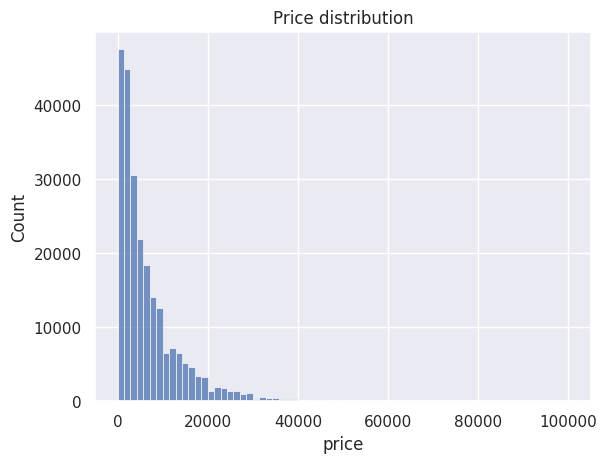

In [215]:
plt.title('Price distribution')
sns.histplot(data['price'], bins=70)

Теперь построим график распределения логарифма:

<Axes: title={'center': 'Price distribution'}, xlabel='price', ylabel='Count'>

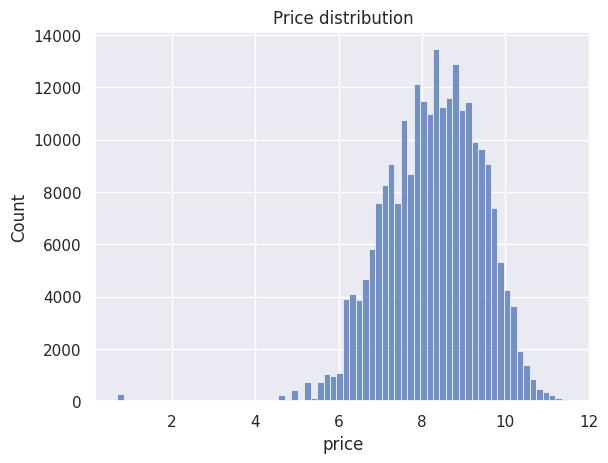

In [216]:
plt.title('Price distribution')
sns.histplot(np.log1p(data['price']), bins=70)

In [217]:
data['price'] = np.log1p(data['price'])

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

В наших данных категориальные переменные - это:

*   название бренда автомобиля
*   название модели автомобиля
*   тип транспортного средства
*   какой вид топлива использует автомобиль
*   есть ли в автомобиле неисправность, которая еще не устранена



Построим "ящики с усами":

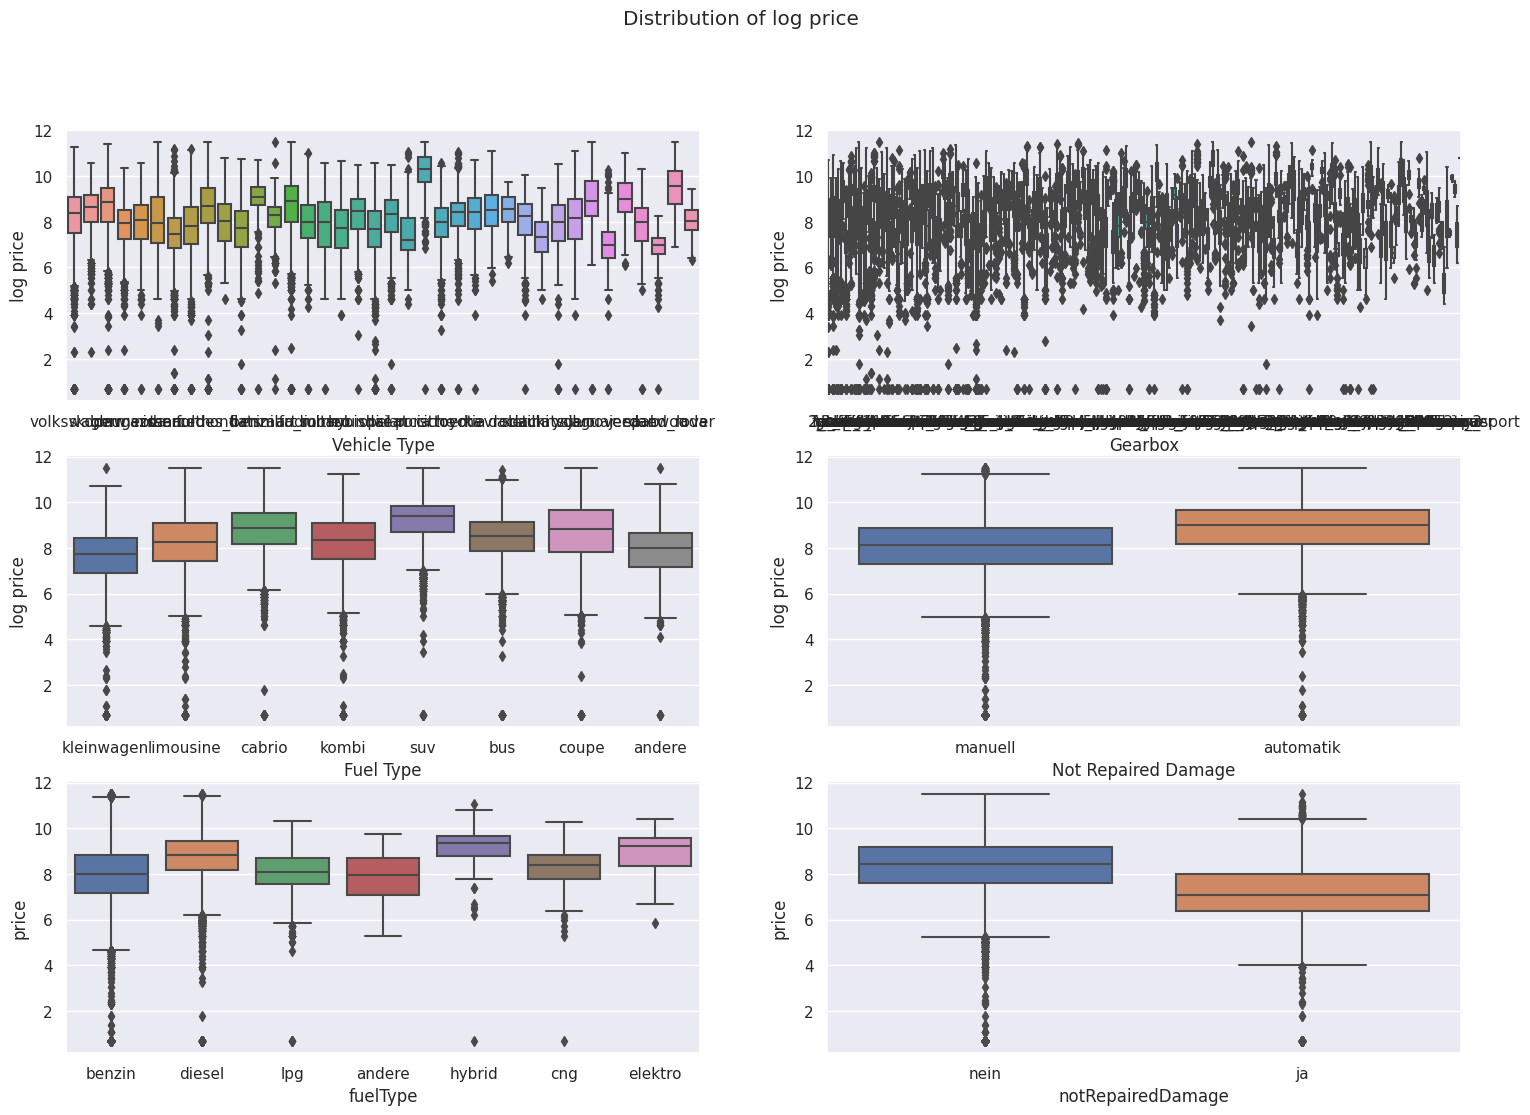

In [218]:
fig, axs = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle('Distribution of log price')

sns.boxplot(ax=axs[0, 0], x=data['brand'], y=data['price'])
axs[0, 0].set_xlabel('brand')
axs[0, 0].set_ylabel('log price')

sns.boxplot(ax=axs[0, 1], x=data['model'], y=data['price'])
axs[0, 0].set_xlabel('model')
axs[0, 0].set_ylabel('log price')

sns.boxplot(ax=axs[1, 0], x=data['vehicleType'], y=data['price'])
axs[0, 0].set_xlabel('Vehicle Type')
axs[0, 0].set_ylabel('log price')

sns.boxplot(ax=axs[1, 1], x=data['gearbox'], y=data['price'])
axs[0, 1].set_xlabel('Gearbox')
axs[0, 1].set_ylabel('log price')

sns.boxplot(ax=axs[2, 0], x=data['fuelType'], y=data['price'])
axs[1, 0].set_xlabel('Fuel Type')
axs[1, 0].set_ylabel('log price')

sns.boxplot(ax=axs[2, 1], x=data['notRepairedDamage'], y=data['price'])
axs[1, 1].set_xlabel('Not Repaired Damage')
axs[1, 1].set_ylabel('log price')

plt.show()

Мы видим, что у первых двух переменных очень много категорий.

Заменим некоторые категориальные признаки на бинарные:

In [219]:
data.replace({'gearbox': {'manuell' : 0, 'automatik' : 1}, 'notRepairedDamage': {'nein' : 0, 'ja' : 1}}, inplace=True)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
train, test_val = train_test_split(data, test_size=0.2, random_state=100)

In [222]:
diff = set(train['model'].unique()) - set(test_val['model'].unique())
train = train.loc[~train['model'].isin(diff)]

<Axes: title={'center': 'Distribution of autos to powerPS'}, xlabel='powerPS', ylabel='Count'>

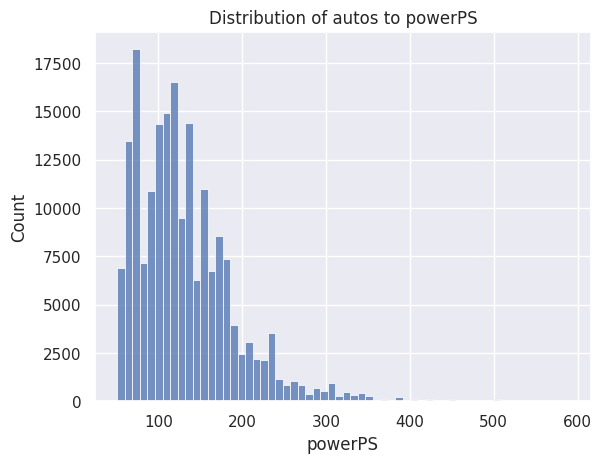

In [223]:
plt.title('Distribution of autos to powerPS')
sns.histplot(train['powerPS'], bins=60)

<Axes: title={'center': 'Distribution of autos to kilometer'}, xlabel='kilometer', ylabel='Count'>

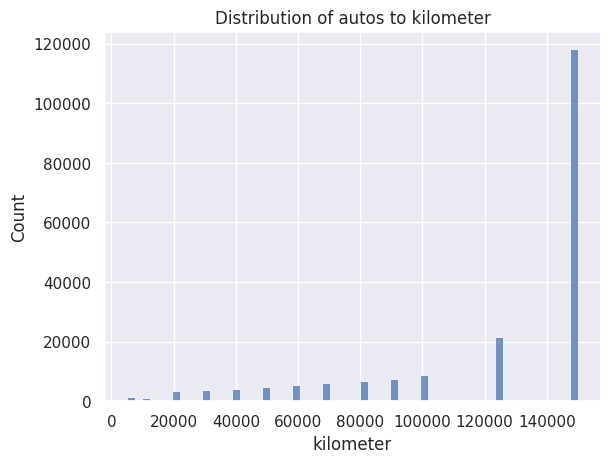

In [224]:
plt.title('Distribution of autos to kilometer')
sns.histplot(train['kilometer'], bins=60)

<Axes: title={'center': 'Distribution of autos to autoAgeMonths'}, xlabel='autoAgeMonths', ylabel='Count'>

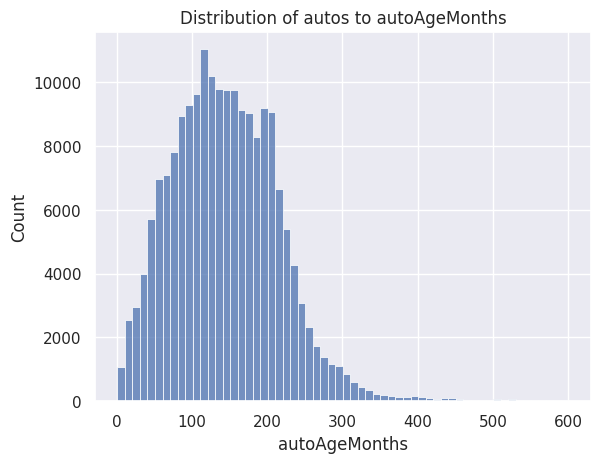

In [225]:
plt.title('Distribution of autos to autoAgeMonths')
sns.histplot(train['autoAgeMonths'], bins=60)

In [226]:
train = train.copy()
test_val = test_val.copy()

train['rare'] = 0
train.loc[((train['autoAgeMonths'] > 250) & (train['price'] > 8)), 'rare'] = 1
test_val['rare'] = 0
test_val.loc[((test_val['autoAgeMonths'] > 300) & (test_val['price'] > 8)), 'rare'] = 1

train['new'] = 0
train.loc[((train['autoAgeMonths'] < 50) & (train['price'] < 7.5)), 'new'] = 1
test_val['new'] = 0
test_val.loc[((test_val['autoAgeMonths'] < 50) & (test_val['price'] < 7.5)), 'new'] = 1

In [227]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage', 'rare', 'new']

# YOUR CODE (EDA):
train['bias'] = 1
test_val['bias'] = 1
other += ['bias']

X_train = train[categorical + numeric + other]
y_train = train['price']
X_test_val = test_val[categorical + numeric + other]
y_test_val = test_val['price']

In [228]:
# data['bias'] = 1
# other += ['bias']

# x = data[categorical + numeric + other]
# y = data['price']

In [229]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

In [230]:
X_train = column_transformer.fit_transform(X_train)
X_test_val = column_transformer.fit_transform(X_test_val)

In [231]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=100)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [233]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_valid = X_valid.toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [234]:
lambdas = np.logspace(-5, 1, 30)

descent_config = {'descent_name': '', 'kwargs': {'dimension': X_train.shape[1], 'lambda_' : 0}}
best_lambda = {'full': 0, 'stochastic': 0, 'momentum': 0, 'adam': 0}


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print('_' * 50, descent_name, sep='\n')


    loss_best = np.inf
    descent_config['descent_name'] = descent_name

    for i in lambdas:
        descent_config['kwargs']['lambda_'] = i

        lreg = LinearRegression(
            descent_config=descent_config
        )
        lreg.fit(X_train, y_train)


        val_loss = lreg.calc_loss(X_valid, y_valid)

        if loss_best > val_loss:
            best_lambda[descent_name] = i
            loss_best = val_loss

        print(f'lambda={i:6f}:\n\t validation loss = {val_loss:6f},\n\t iterations = {len(regression.loss_history)}')
        print('_' * 50)

__________________________________________________
full
lambda=0.000010:
	 validation loss = 30.722492,
	 iterations = 11
__________________________________________________
lambda=0.000016:
	 validation loss = 26.361882,
	 iterations = 11
__________________________________________________
lambda=0.000026:
	 validation loss = 26.433590,
	 iterations = 11
__________________________________________________
lambda=0.000042:
	 validation loss = 31.808357,
	 iterations = 11
__________________________________________________
lambda=0.000067:
	 validation loss = 25.831544,
	 iterations = 11
__________________________________________________
lambda=0.000108:
	 validation loss = 35.077676,
	 iterations = 11
__________________________________________________
lambda=0.000174:
	 validation loss = 32.045056,
	 iterations = 11
__________________________________________________
lambda=0.000281:
	 validation loss = 49.580591,
	 iterations = 11
__________________________________________________
lambda=0

In [235]:
best_lambda

{'full': 2.395026619987486,
 'stochastic': 0.9236708571873865,
 'momentum': 1.4873521072935119,
 'adam': 2.395026619987486}

In [243]:
from sklearn.metrics import r2_score

losses = {}
iter = {}
descents = ['full', 'stochastic', 'momentum', 'adam']

for i in descents:
    print('|' * 40, i, sep='\n')

    descent_config['descent_name'] = i
    descent_config['kwargs']['lambda_'] = best_lambda[i]

    lreg = LinearRegression(descent_config=descent_config)
    lreg.fit(X_train, y_train)

    train_loss = lreg.calc_loss(X_train, y_train)
    test_loss = lreg.calc_loss(X_test, y_test)

    r2_train = r2_score(lreg.predict(X_train), y_train)
    r2_test = r2_score(lreg.predict(X_test), y_test)

    hist = lreg.loss_history
    losses[i] = lreg.loss_history
    iter[i] = len(lreg.loss_history)

    print(f'lambda={best_lambda[i]:6f}:\n\t train loss = {train_loss:6f},\n\t test loss = {test_loss:6f},\n\t R2 train score = {r2_train:6f},\n\t R2 test score = {r2_test:6f},\n\t iterations = {iter[i]}')

||||||||||||||||||||||||||||||||||||||||
full
lambda=2.395027:
	 train loss = 0.330882,
	 test loss = 0.326668,
	 R2 train score = 0.679705,
	 R2 test score = 0.683696,
	 iterations = 78
||||||||||||||||||||||||||||||||||||||||
stochastic
lambda=0.923671:
	 train loss = 0.351448,
	 test loss = 0.352596,
	 R2 train score = 0.683265,
	 R2 test score = 0.682775,
	 iterations = 301
||||||||||||||||||||||||||||||||||||||||
momentum
lambda=1.487352:
	 train loss = 0.271415,
	 test loss = 0.271478,
	 R2 train score = 0.740616,
	 R2 test score = 0.739111,
	 iterations = 129
||||||||||||||||||||||||||||||||||||||||
adam
lambda=2.395027:
	 train loss = 0.255040,
	 test loss = 0.260034,
	 R2 train score = 0.762579,
	 R2 test score = 0.756808,
	 iterations = 142


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

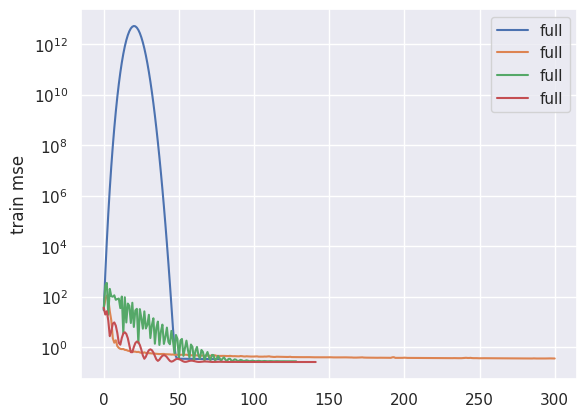

In [248]:
descents = ['full', 'stochastic', 'momentum', 'adam']

plt.figure()
for i in descents:
    plt.plot(losses[i], label = descent_name)
plt.ylabel('train mse')
plt.yscale('log')
plt.legend()
plt.show()

Методы сходятся похожим образом. Самый медленный по схождению - стохастический спуск, самый быстрый - градиентный. Adam и momentum сходятся похожим образом.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 10)

from time import time
from tqdm import tqdm

descents = ['full', 'stochastic', 'momentum', 'adam']
config = {'descent_name': '', 'kwargs': {'dimension': X_train.shape[1], 'lambda_' : 0}}

sgd_avg_times = []
sgd_iterations = []
for i in tqdm(range(len(batch_sizes))):
    batch_size = batch_sizes[i]
    config['kwargs']['batch_size'] = batch_size

    fit_times = []
    iters = []
    for j in tqdm(range(10)):
        regression = LinearRegression(
            descent_config=descent_config
        )
        fit_start = time()
        regression.fit(X_train, y_train)
        fit_end = time()
        fit_times.append(fit_end - fit_start)
        iters.append(len(regression.loss_history))

    sgd_avg_times.append(np.array(fit_times).mean())
    sgd_iterations.append(np.array(iters).mean())

  0%|          | 0/10 [00:00<?, ?it/s]

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Яичница-шакшука:
Яйца – 2 или 3 шт.
Перец болгарский – 200 г (1 шт.)
Помидор – 200 г (1 шт.)
Томатная паста - 200 г
Лук репчатый – 80 г (1 шт.)
Чеснок – 2 зубчика
Масло растительное – 2 ст. ложки
Соль – по вкусу
Перец черный молотый – по вкусу
Зелень – по вкусу



1.   Мелко нарезаем лук и чеснок, обжариваем на разогретой сковороде.
2.   Нарезаем перец и отправляем жариться на средне-сильном огне.
3.   Когда перец достаточно обжарился добавляем нарезанный кубиком помидор и томатную пасту. Добавляем соль и специи по вкусу.
4.   Жарим некоторое время на среднем огне, после чего добавляем яйца и уменьшаем огонь.
5.   Жарим до готовности яиц, посыпаем зеленью.





Впечатления очень хорошие, отличное блюдо, всем советую. Фотографии гостя к сожалению нет(

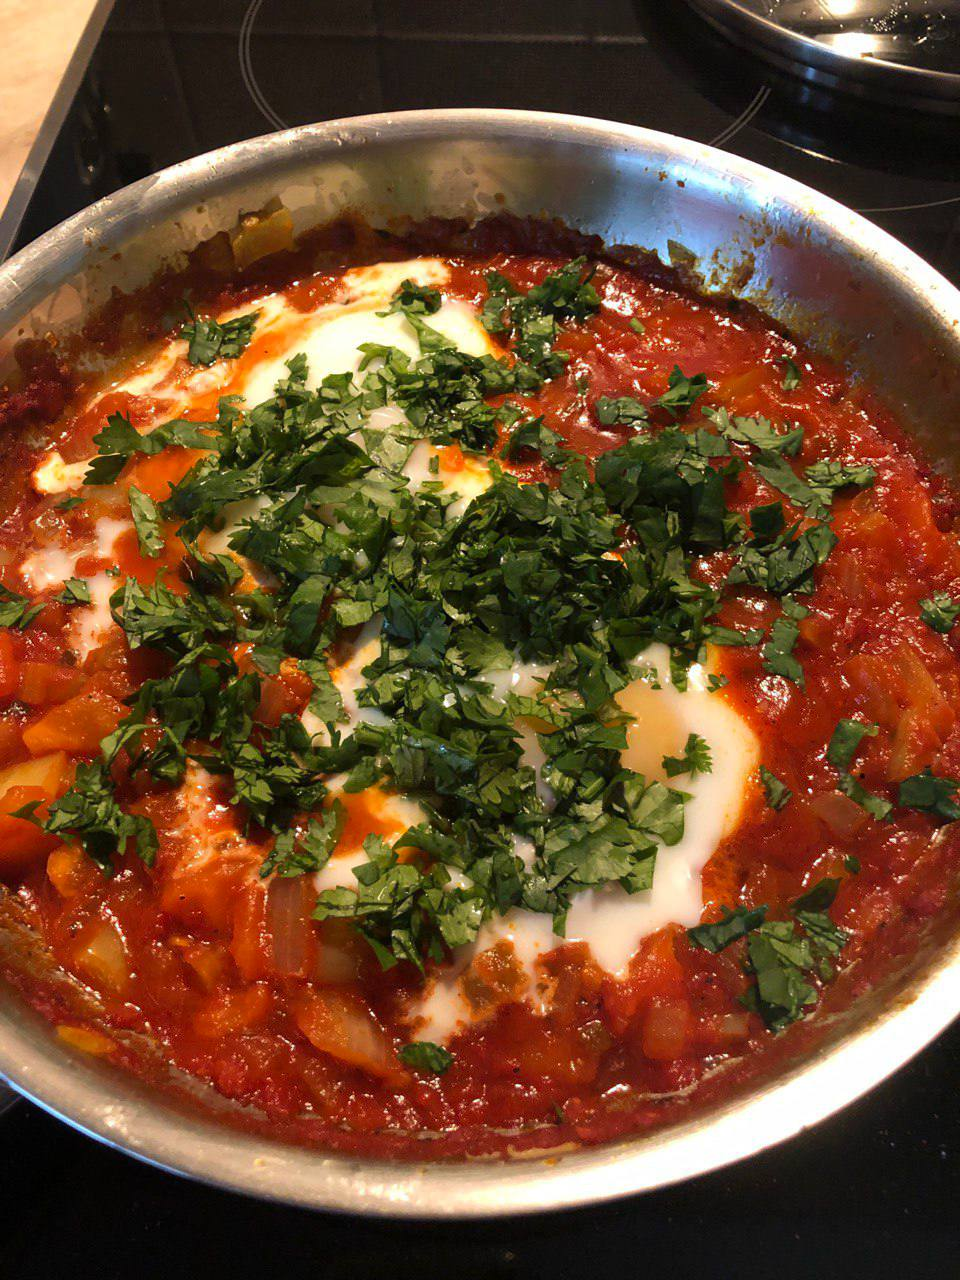

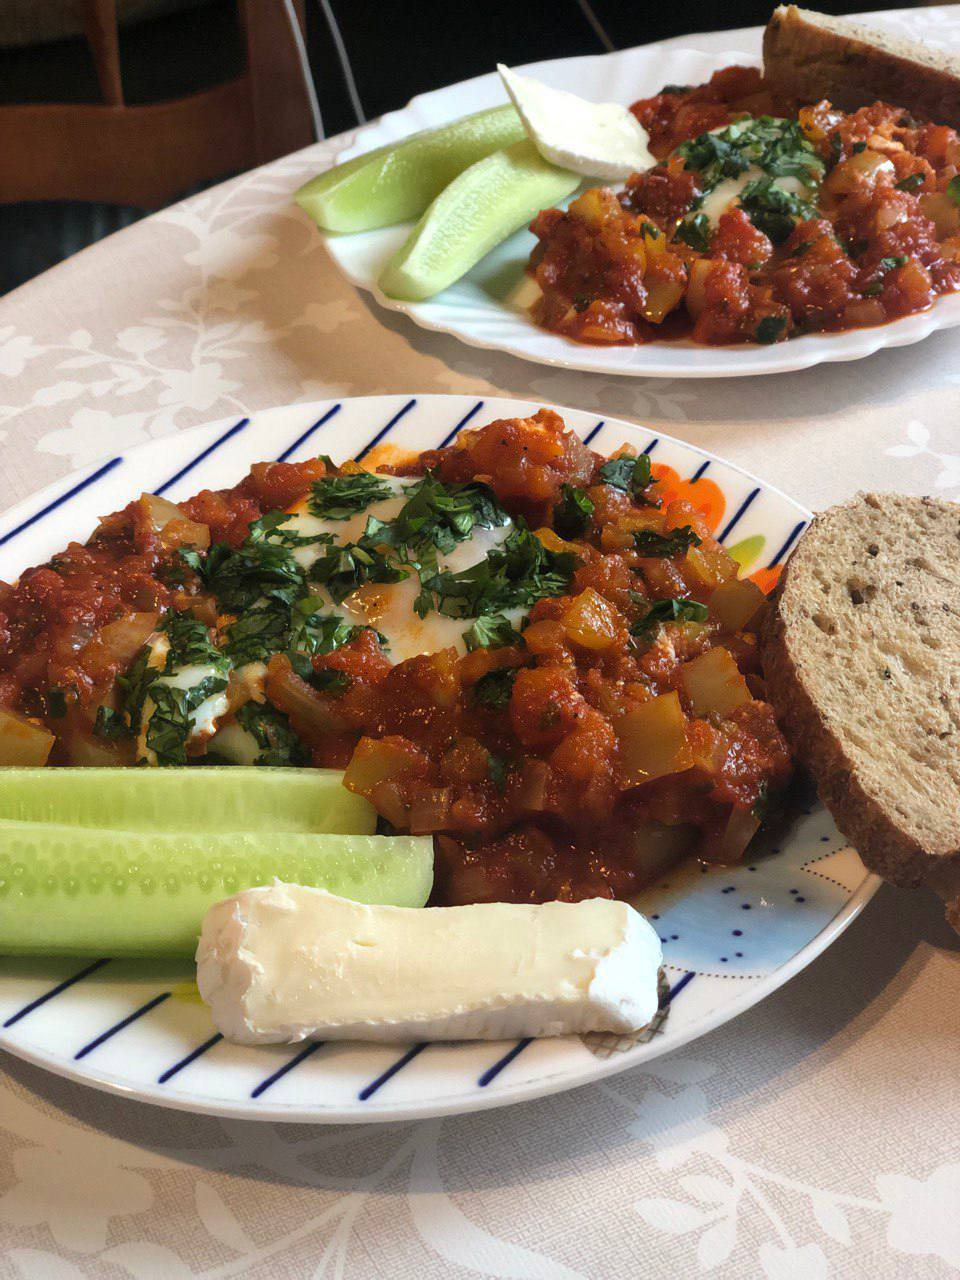

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: